In [1]:
import Structural_analysis as dp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Example 2

Solution of static problelem obtained from source [1]. The system was broken down to 3 beams and 4 supports. Supports are named "a", "b",... from upper left in clokwise, beams are named "first", "second",.. from upper to bottom. According to [1] the problem was solved correctly.
<img src="files/678.png" style="width: 500px;"/>

In [4]:
#In this cell we define all supports and beams included in the problem

a = dp.Support("a", 'pinned', 0, 0)
b = dp.Support("b", 'joint', 3, 0)
c = dp.Support("c", "endpoint", 3, 3)
d = dp.Support("d", "pinned", 0, 3)

first = dp.Beam('first', [a,], [b,],  0.006, 200e6, 0.01, 3, 100)
second = dp.Beam('second', [b,], [c,],  0.006, 200e6, 0.01, 3, 100)
third = dp.Beam('third', [c,], [d,],  0.006, 200e6, 0.01, 3, 100)

In [5]:
#In this cell we define the matrices for solving main differential equations of individual beams

first.set_equations_u()
first.set_equations_w()
second.set_equations_u()
second.set_equations_w()
third.set_equations_u()
third.set_equations_w()

In [6]:
#In this cell we define transformation matrices used for transforming variables from local coordinate systems of individual beam to global coordinate system

first.transformation_matrix()
second.transformation_matrix()
third.transformation_matrix()

In [7]:
#in this cell we define all boundry equations hat may be needed for individual beam and support

first.set_boundry_1()
first.set_boundry_2()
second.set_boundry_1()
second.set_boundry_2()
third.set_boundry_1()
third.set_boundry_2()

first.set_boundry_M(first.B_1, a)
first.set_boundry_M(first.B_2, b)

second.set_boundry_M(second.B_1, b)
second.set_boundry_M(second.B_2, c)

third.set_boundry_M(third.B_1, c)
third.set_boundry_M(third.B_2, d)

In [8]:
#In this cell we form final beam matrices

first.form_M([a,], [b,])
second.form_M([b,], [c,])
third.form_M([c,], [d,])

In [9]:
#In this cell we define loading conditions, either forces or moments on supports or continual loading on beams

first.set_loading(0, 200)
second.set_loading(0, 0)
third.set_loading(0, 0)

a.set_boundryforces(0, 0, 0, 0, 0, 0)
b.set_boundryforces(0, 0, 0, 0, 0, 0)
c.set_boundryforces(0, 0, 0, 0, 0, 0)
d.set_boundryforces(0, 0, 0, 0, 0, 0)

In [10]:
#In this cell we form boundry matrices for individual beams

first.form_b([a,],  [b,])
second.form_b([b,],  [c,])
third.form_b([c,],  [d,])

In [11]:
#Forms final matric and vector for calculation, Naming is vector containing information abount individual equation in M
M, b, Naming = dp.main_matrix_formation(
    (first.M, second.M, third.M), 
    (first.b, second.b, third.b), 
    (first.Naming, second.Naming, third.Naming),  (a, b, c, d))

In [12]:
#Solving the problem
r = np.linalg.solve(M, b)

In [13]:
#Resoult parsing and calculating internal forces
dp.resoult_parsing(r, first, second, third)

first.calculate_NTM()
second.calculate_NTM()
third.calculate_NTM()

## Plots for individual beam

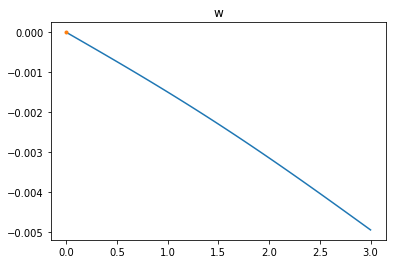

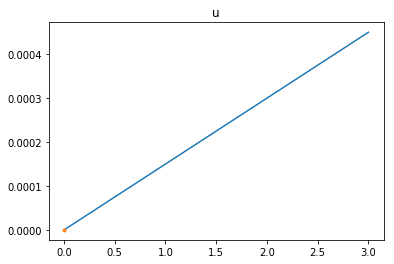

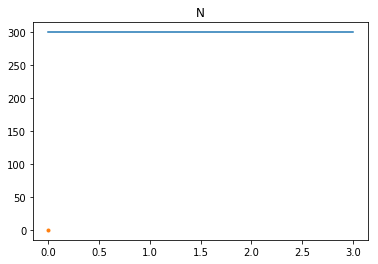

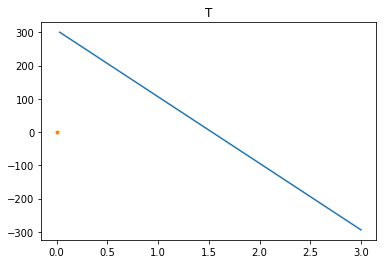

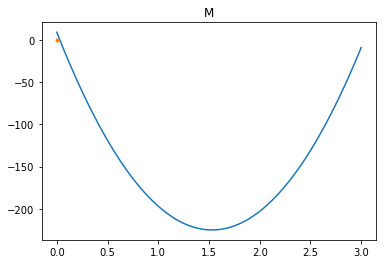

In [14]:
first.drawing()

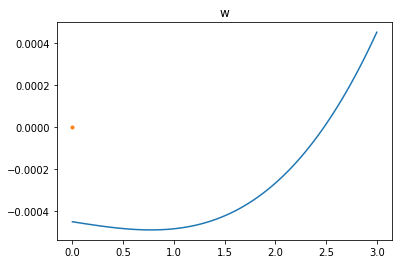

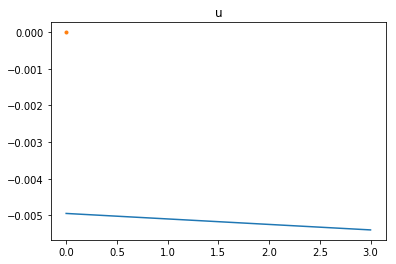

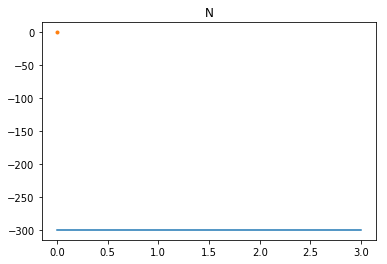

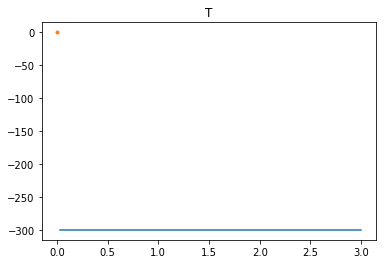

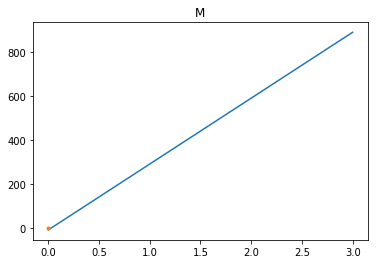

In [15]:
second.drawing()

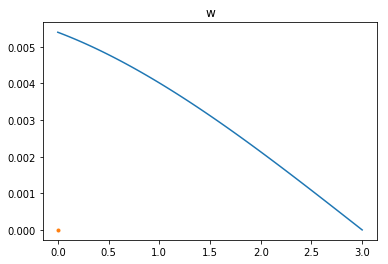

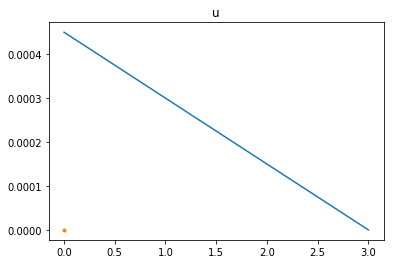

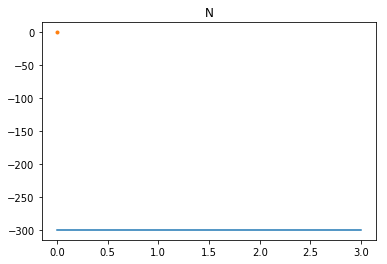

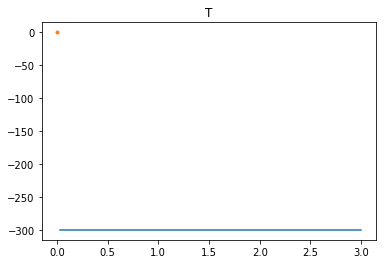

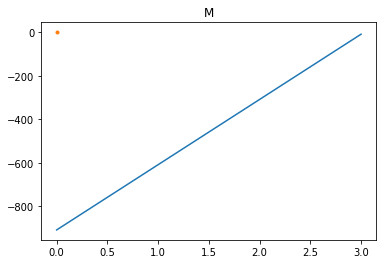

In [16]:
third.drawing()

### References
[1] Hibbeler, R. C., Statics, 12th edition, page 313